---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
In this notebook, I will be using only **EDA** part.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing.
**DATASET LINK**
https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

---
<a name = Section2></a>
# **2. Problem Statement**
---

- This section is emphasised on providing some generic introduction to the problem that most companies confronts.



 -This dataset comes from the UCI repository of databases.
 
 -The task is to predict if an individual's annual income excceds **$50,000** based on census data.



<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [1]:
!pip install -q datascience                  
!pip install -q pandas-profiling      

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

ERROR: Invalid requirement: '#'


### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [3]:
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib                                             
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")     

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

|Id|Feature|Description|
|:--|:--|:--|
|01| Age           | Describes the age of individuals. Continuous.| 
|02| Workclass         | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.|  
|03| fnlwgt          | Continuous| 
|04| education          | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.|   
|05| education-num       | Number of years spent in education. Continuous.|
|06| marital-status          | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.|
|07| occupation       | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
|08| relationship         | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.|
|09| race  | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.|
|10| sex         | Female, Male.|
|11| capital-gain         |Continuous.|
|12| capital-loss         | Continuous.|
|13| hours-per-week         | Continuous.|
|14| native-country         | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.|
|15| salary         | >50K,<=50K|


In [4]:
data=pd.read_csv("adult.csv")

In [5]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
data.shape

(48842, 15)

In [8]:
print(f"No. of Rows {data.shape[0]}")
print(f"No. of Columns {data.shape[1]}")


No. of Rows 48842
No. of Columns 15


In [9]:
backup=data.copy()

### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [10]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.00000,48842.00000,48842.00000,48842.00000,48842.00000,48842.00000
mean,38.64359,189664.13460,10.07809,1079.06763,87.50231,40.42238
std,13.71051,105604.02542,2.57097,7452.01906,403.00455,12.39144
min,17.00000,12285.00000,1.00000,0.00000,0.00000,1.00000
25%,28.00000,117550.50000,9.00000,0.00000,0.00000,40.00000
50%,37.00000,178144.50000,10.00000,0.00000,0.00000,40.00000
75%,48.00000,237642.00000,12.00000,0.00000,0.00000,45.00000
max,90.00000,1490400.00000,16.00000,99999.00000,4356.00000,99.00000


### **Data Information**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.00000,48842.00000,48842.00000,48842.00000,48842.00000,48842.00000
mean,38.64359,189664.13460,10.07809,1079.06763,87.50231,40.42238
std,13.71051,105604.02542,2.57097,7452.01906,403.00455,12.39144
min,17.00000,12285.00000,1.00000,0.00000,0.00000,1.00000
25%,28.00000,117550.50000,9.00000,0.00000,0.00000,40.00000
50%,37.00000,178144.50000,10.00000,0.00000,0.00000,40.00000
75%,48.00000,237642.00000,12.00000,0.00000,0.00000,45.00000
max,90.00000,1490400.00000,16.00000,99999.00000,4356.00000,99.00000


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [13]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
data.duplicated().sum()

52

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

In [17]:
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [18]:
data['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [19]:
data.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [20]:
data['workclass']=data['workclass'].replace("?",np.nan )
data['occupation']=data['occupation'].replace("?",np.nan )
data['native-country']=data['native-country'].replace("?",np.nan )

In [21]:
data['workclass'].isnull().sum(),data['occupation'].isnull().sum(),data['native-country'].isnull().sum()

(2795, 2805, 856)

In [22]:
(data.isnull().sum()/len(data))*100

age               0.00000
workclass         5.72863
fnlwgt            0.00000
education         0.00000
educational-num   0.00000
marital-status    0.00000
occupation        5.74913
relationship      0.00000
race              0.00000
gender            0.00000
capital-gain      0.00000
capital-loss      0.00000
hours-per-week    0.00000
native-country    1.75446
income            0.00000
dtype: float64

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling typos

## Null value is very less % so  Drop it .

In [23]:
data.dropna(how='any' ,inplace=True)

In [24]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [25]:
data.shape

(45175, 15)

In [26]:
data.duplicated().sum()

0

In [27]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.00000,45175.00000,45175.00000,45175.00000,45175.00000,45175.00000
mean,38.55617,189738.79845,10.11931,1102.57627,88.68759,40.94251
std,13.21535,105652.43651,2.55174,7510.24988,405.15661,12.00773
min,17.00000,13492.00000,1.00000,0.00000,0.00000,1.00000
25%,28.00000,117392.50000,9.00000,0.00000,0.00000,40.00000
50%,37.00000,178312.00000,10.00000,0.00000,0.00000,40.00000
75%,47.00000,237903.00000,13.00000,0.00000,0.00000,45.00000
max,90.00000,1490400.00000,16.00000,99999.00000,4356.00000,99.00000


In [28]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [29]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [30]:
data["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [31]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

In [32]:
# drop Education-num ,Capital-gain,Capital-loss column .
#Beacause Education-num and Education are very much similar.
#capital-loss and capital-gain have mare than 75% value are Zero
data.drop(['educational-num','capital-gain','capital-loss'],axis=1,inplace=True)

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

In [33]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


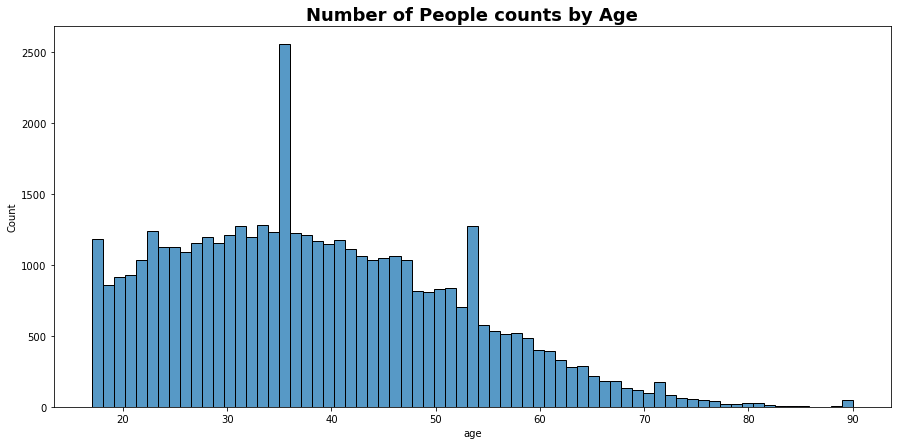

In [34]:
fig = plt.figure(figsize=[15, 7])
sns.histplot(data=data,x='age')
plt.title('Number of People counts by Age', fontsize=18, fontweight='bold')

plt.show()

In [35]:
sum((data['age']>=17) & (data['age'] <=50))

36495

In [36]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

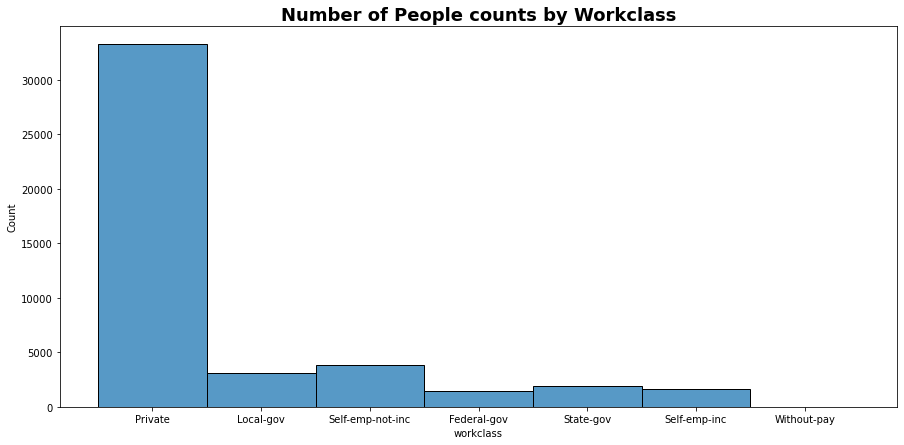

In [37]:
fig = plt.figure(figsize=[15, 7])
sns.histplot(data=data,x='workclass')
plt.title('Number of People counts by Workclass', fontsize=18, fontweight='bold')

plt.show()

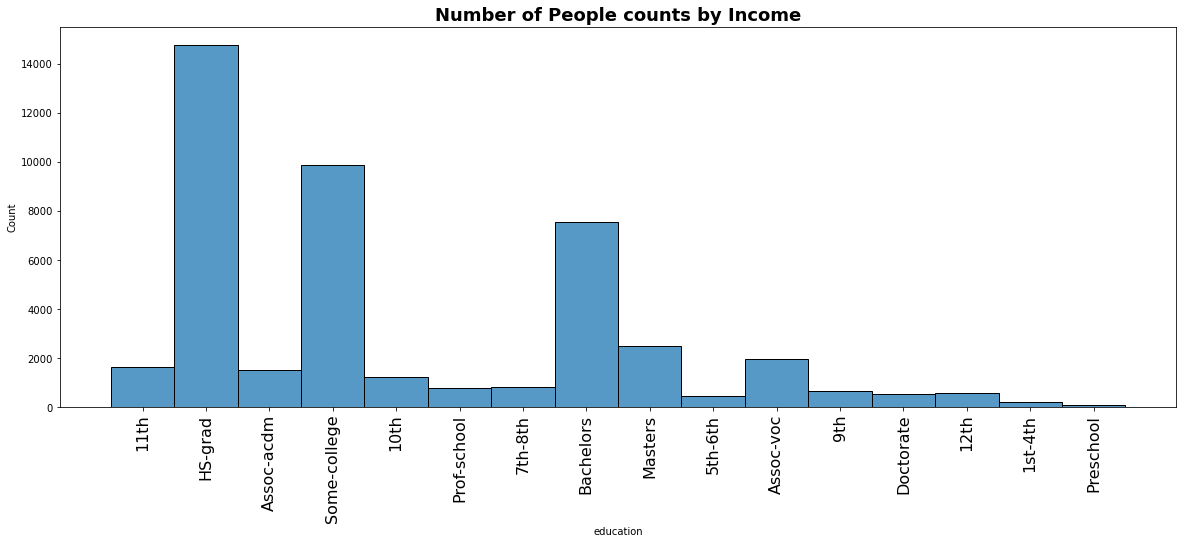

In [38]:
fig = plt.figure(figsize=[20, 7])
sns.histplot(data=data,x='education')
plt.title('Number of People counts by Income', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.show()

In [39]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

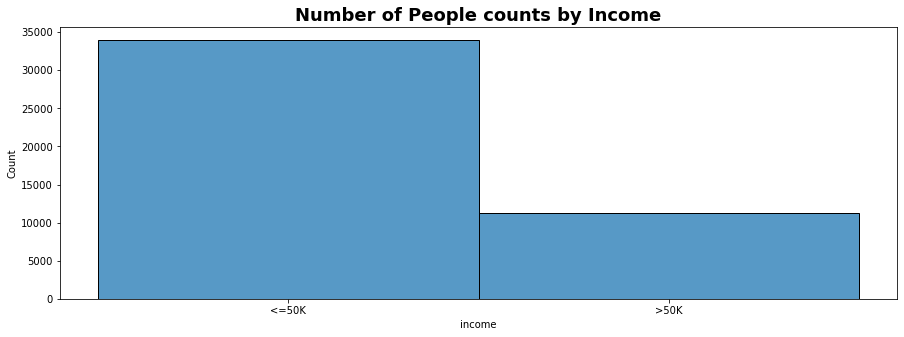

In [40]:
fig = plt.figure(figsize=[15, 5])
sns.histplot(data=data,x='income')
plt.title('Number of People counts by Income', fontsize=18, fontweight='bold')
plt.show()


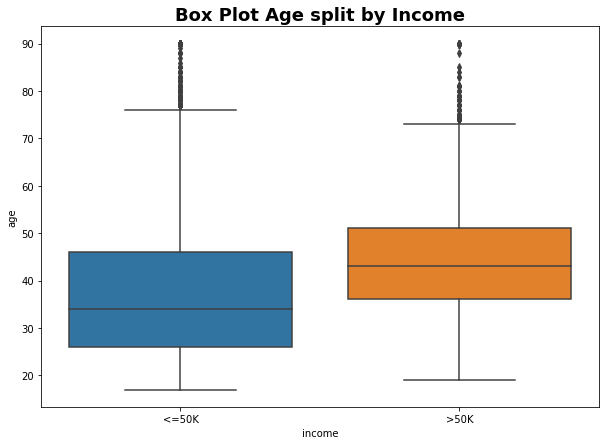

In [41]:
fig = plt.figure(figsize=[10, 7])
sns.boxplot(x='income',y='age',data=data)
plt.title('Box Plot Age split by Income', fontsize=18, fontweight='bold')
plt.show()

<Figure size 720x504 with 0 Axes>

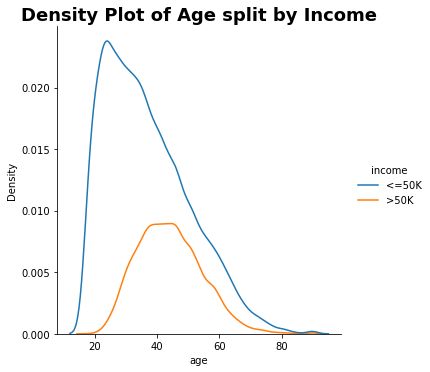

In [42]:
fig = plt.figure(figsize=[10, 7])
sns.displot(data, x="age", hue="income", kind="kde")
plt.title('Density Plot of Age split by Income', fontsize=18, fontweight='bold')
plt.show()

In [43]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

data['age_group'] = data['age'].apply(age_group)

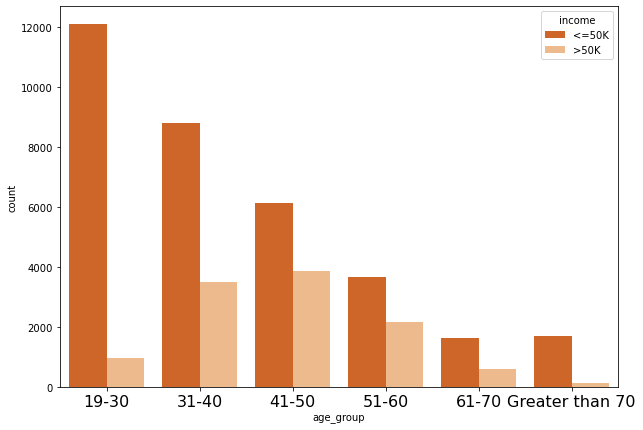

In [44]:
fig = plt.figure(figsize=[10, 7])
age_list= ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(data['age_group'], hue = data['income'], palette='Oranges_r', order = age_list)
plt.xticks(fontsize=16)
plt.show()

## Observation
We make an interesting observation over here. 

We see that people earning more than 50K dollars **increase as the age increases upto a certain extent**.

As one might imagine, the number of people earning more than 50K is quite negligible amongst people of **age group 19-30**.
For the people of **age group 41-50 and 51-60**, the number of people earning more than 50K is quite comparable to those earning less than it!

In [45]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income', 'age_group'],
      dtype='object')

In [46]:
data['workclass'].value_counts()

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

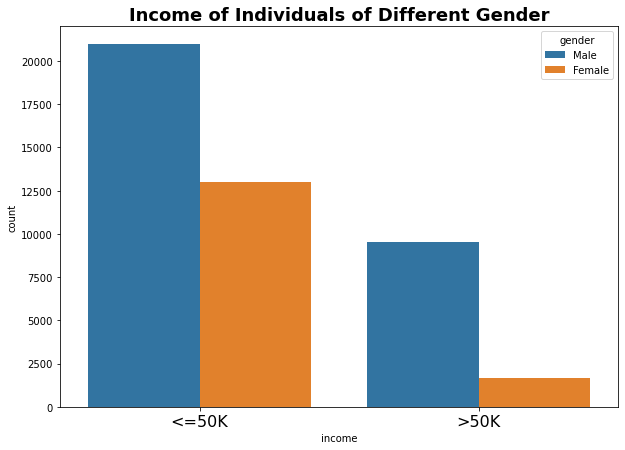

In [47]:
fig = plt.figure(figsize=[10, 7])
sns.countplot(data['income'],hue=data['gender'],data=data)
plt.title('Income of Individuals of Different Gender', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)

plt.show()

## Observation
## We can see a significant gap in the earnings between males and females over here.
Males are earning more >50k income than females.

Text(0.5, 1.0, 'Income of Individuals of Different Working CLasses')

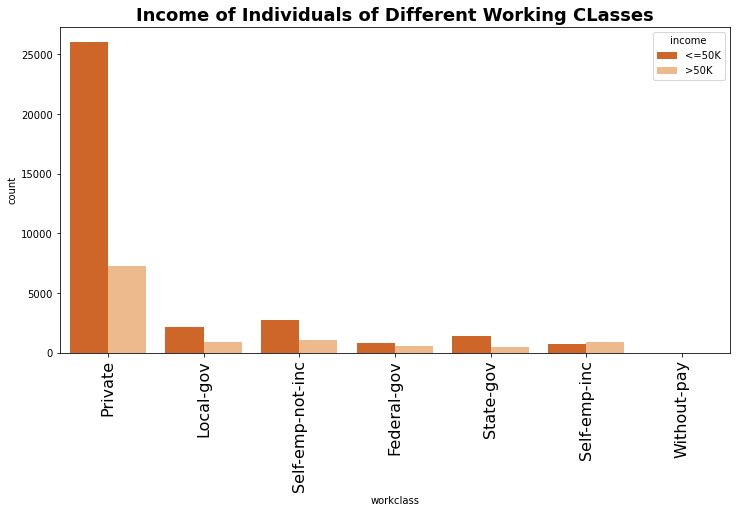

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(data['workclass'], hue = data['income'], palette='Oranges_r')
plt.xticks(fontsize=16,rotation = 90)
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')

## Observation
In the above graph, we have segregated the incomes of adults on the basis of their different **working classes**.

It is quite interesting to see that **Self-Employed-inc** is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!

People working in the **Private Sector** face a significant difference between their pays where more people are earn less than 50K dollars an year!

There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the **Federal Govt**.

People belonging to the category **Without-Pay** hardly contain any data in both the categories.

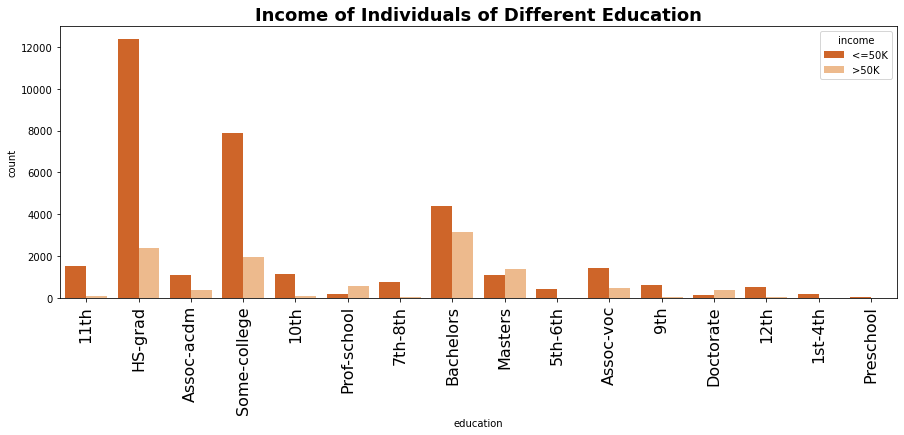

In [49]:
fig = plt.figure(figsize=[15, 5])
sns.countplot(data['education'], hue = data['income'], palette='Oranges_r', data= data)
plt.title('Income of Individuals of Different Education', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.show()

## Observation
 **We can draw a few conclusions from this graph**.

For the people who have completed their education up till **12th Standard**, there are just a handful of them who earn **more than 50K dollars** an year. Most of the people end up earning **below 50K**!

For the people belonging to **Bachelors, Masters, Doctorate, Prof-school** category in the education level, there are more number of people who are earning greater than **50K dollars** an year than the number of people earning less than it.

In case of **Assoc-acad or Assoc-voc**, there are a few people who earn more than **50K dollars** an year!

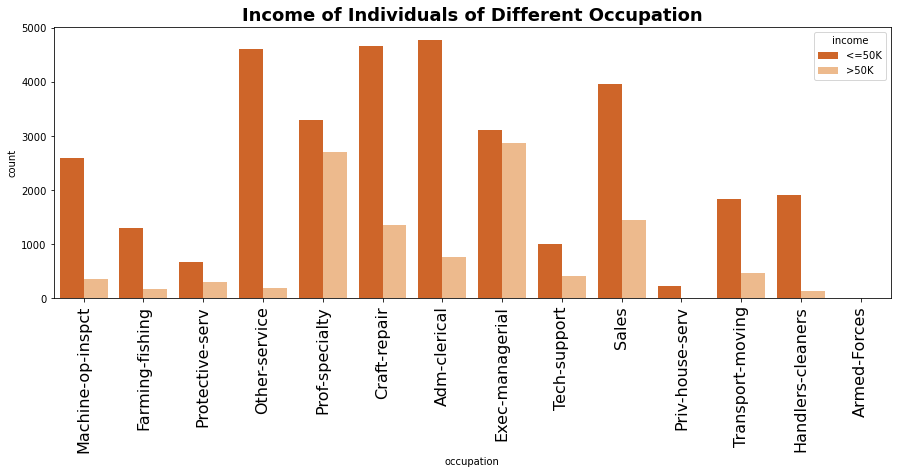

In [50]:
fig = plt.figure(figsize=[15, 5])
sns.countplot(data['occupation'], hue = data['income'], palette='Oranges_r', data= data)
plt.title('Income of Individuals of Different Occupation', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)

plt.show()

## Observation
A few points to note over here:-

Adults in **Exec-managerial** role are equally likely to earn more than 50K dollars an year.

There's close to 33% probablity for an adult in **Prof-specialty** to earn more than 50K dollars an year.

Adults working in **Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving** are very less likely to earn more than 50K dollars an year.

Around 25% of the people working in **Sales** earn more than 50K dollars an year.

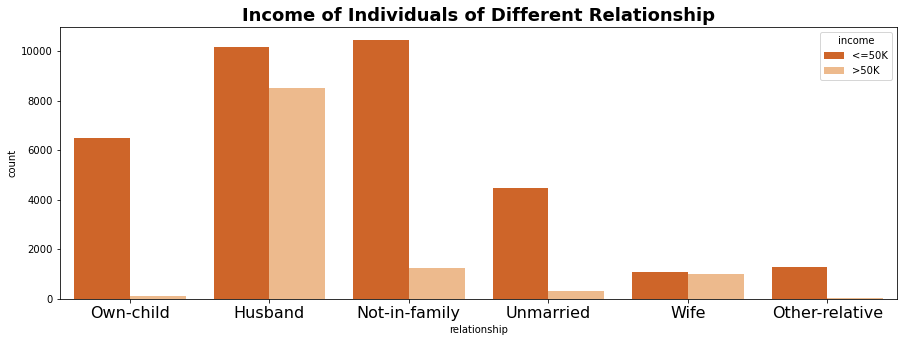

In [51]:
fig = plt.figure(figsize=[15, 5])
sns.countplot(data['relationship'], hue = data['income'], palette='Oranges_r', data= data)
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.show()

## Observation
**Wives** are equally likely to earn more than 50K dollars an year.

For **Husbands**, although significant, there is less possibility of them to earn more than 50K dollars an year.

There are just a handful of **Unmarried** people earning more than 50K dollars an year.

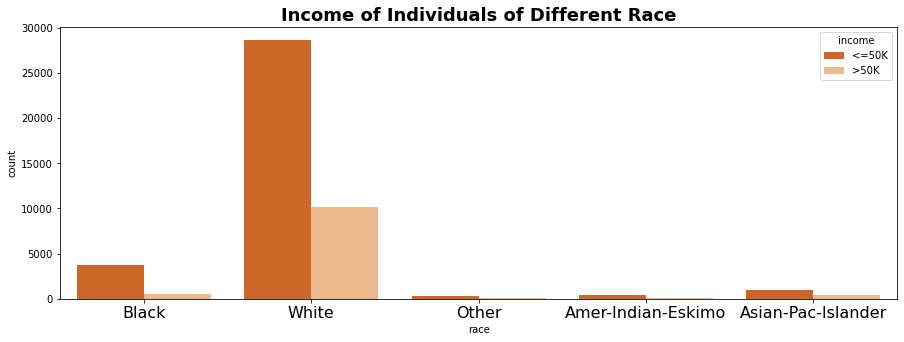

In [52]:
fig = plt.figure(figsize=[15, 5])
sns.countplot(data['race'], hue = data['income'], palette='Oranges_r', data= data)
plt.title('Income of Individuals of Different Race', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.show()

## Observation
An important point to notice over here is that, except **Whites** there are very few people of different races.

In [53]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


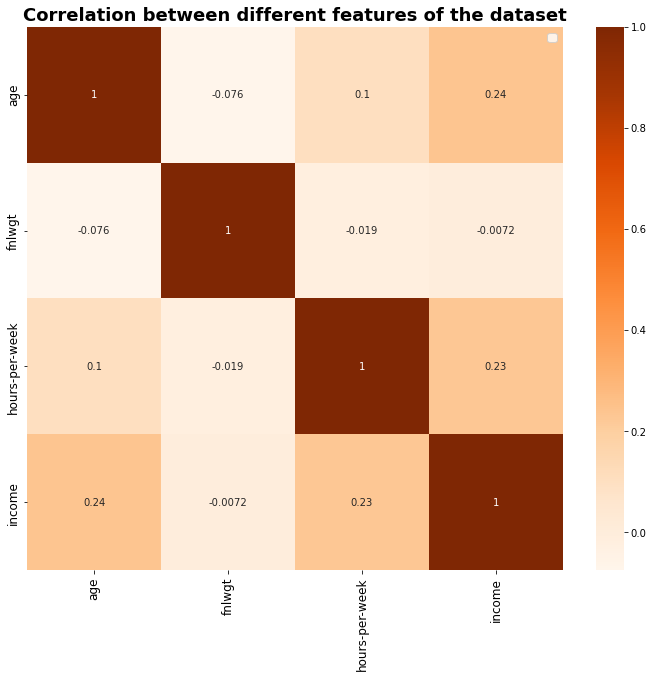

In [54]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), cmap = 'Oranges', annot = True)
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')

plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)
plt.show()

## Observation

Here, we have tried to plot a correlation map in order to see whether the features related to each other.

We see that most of the features are **positively** correlated with the **Income Variable**.

An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.